<a href="https://colab.research.google.com/github/Max-Willians/Data_Visualization/blob/main/desafio_graficos_de_composicao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
AZUL1, AZUL2, AZUL3, AZUL4, AZUL5, AZUL6 = '#174A7E', '#4A81BF', "#6495ED", '#2596BE', '#94AFC5', '#CDDBF3'
CINZA1, CINZA2, CINZA3, CINZA4, CINZA5, CINZA6, BRANCO = '#231F20', '#414040', '#555655', '#A6A6A5', '#BFBEBE', '#CED4DA' , '#FFFFFF'
VERMELHO1, VERMELHO2, LARANJA1 = '#C3514E',	'#E6BAB7', '#F79747'
VERDE1, VERDE2, VERDE3 = '#0C8040', '#9ABB59', '#9ECCB3'

In [ ]:
df_pib = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/dataviz-graficos-composicao-relacionamento/refs/heads/main/dados/pib_br_2002_2020_estados.csv')
df_pib.head()

,ano,sigla_uf,regiao,pib,impostos_liquidos,va,va_agropecuaria,va_industria,va_servicos,va_adespss
0,2002,RO,Norte,7467629886,839731192,6627898698,715526872,1191090432,2484579193,2236702207
1,2003,RO,Norte,9425010486,1108434936,8316575548,1278658831,1216605061,3376727040,2444584625
2,2004,RO,Norte,11004641436,1288806654,9715834778,1288515348,1674933817,3986529419,2765856199
3,2005,RO,Norte,12511821181,1476144194,11035676990,1342222120,1887932121,4603783904,3201738843
4,2006,RO,Norte,13054713344,1613809974,11440903374,1238006193,2210692147,4320526746,3671678293


In [ ]:
df_pib.describe()

,ano,pib,impostos_liquidos,va,va_agropecuaria,va_industria,va_servicos,va_adespss
count,513.000000,5.130000e+02,5.130000e+02,5.130000e+02,5.130000e+02,5.130000e+02,5.130000e+02,5.130000e+02
mean,2011.000000,1.636426e+11,2.339900e+10,1.402436e+11,7.564326e+09,3.384748e+10,7.521962e+10,2.361217e+10
std,5.482572,3.099984e+11,4.970839e+10,2.605949e+11,9.135246e+09,6.118359e+10,1.677667e+11,3.079509e+10
min,2002.000000,2.392033e+09,1.743595e+08,2.217673e+09,3.960285e+07,2.253353e+08,7.731723e+08,1.032383e+09
25%,2006.000000,2.640489e+10,2.950929e+09,2.343499e+10,1.324891e+09,4.270984e+09,9.295408e+09,5.890425e+09
50%,2011.000000,6.239678e+10,7.779532e+09,5.543179e+10,3.791625e+09,1.094662e+10,2.443881e+10,1.231902e+10
75%,2016.000000,1.635753e+11,2.089228e+10,1.431282e+11,1.034853e+10,3.404834e+10,6.788327e+10,2.695578e+10
max,2020.000000,2.377639e+12,3.730275e+11,2.014850e+12,5.649386e+10,4.168730e+11,1.356312e+12,1.972741e+11


In [ ]:
df_pib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513 entries, 0 to 512
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ano                513 non-null    int64 
 1   sigla_uf           513 non-null    object
 2   regiao             513 non-null    object
 3   pib                513 non-null    int64 
 4   impostos_liquidos  513 non-null    int64 
 5   va                 513 non-null    int64 
 6   va_agropecuaria    513 non-null    int64 
 7   va_industria       513 non-null    int64 
 8   va_servicos        513 non-null    int64 
 9   va_adespss         513 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 40.2+ KB


# Desafio 1

Como estão dispostos os valores agregados de serviços por região do Brasil no ano de 2018?

In [ ]:
df_servicos = df_pib.copy()
df_servicos = df_servicos.query('ano == 2018')[['regiao', 'va_servicos']]
df_servicos = df_servicos.groupby('regiao').sum()
df_servicos = df_servicos.sort_values('va_servicos', ascending=False)

df_servicos.head()

,va_servicos
regiao,
Sudeste,1933221862566
Sul,546627330178
Nordeste,433449662991
Centro-Oeste,296250896281
Norte,133394247965


# Gerando o Gráfico

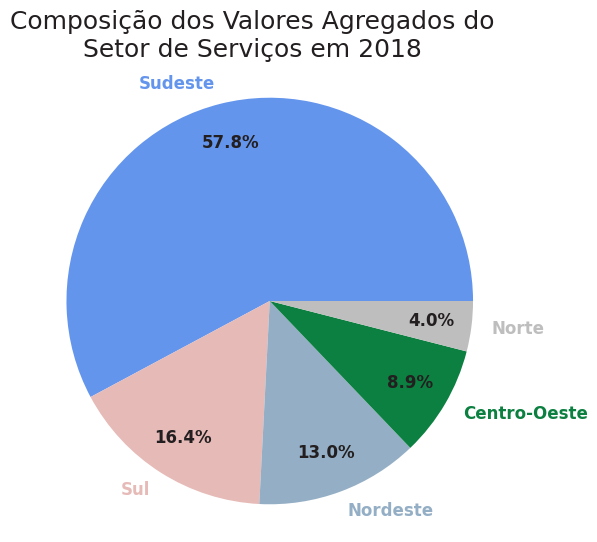

In [ ]:
# Área do gráfico e tema da visualização
fig, ax = plt.subplots(figsize=(14,6))

# Definindo as cores do gráfico
cores = [AZUL3, VERMELHO2, AZUL5 , VERDE1, CINZA5]

# Gerando o gráfico de pizza
ptc, text, _ = ax.pie(data= df_servicos, x='va_servicos', labels=df_servicos.index, autopct='%.1f%%',
                      radius = 1.1, pctdistance=0.8, colors = cores,
                      textprops={'size': 12, 'fontweight': 'bold', 'color':CINZA1})

# Personalizando o gráfico
plt.suptitle('Composição dos Valores Agregados do\nSetor de Serviços em 2018', size=18, color=CINZA1)

# Ajustando as cores das regiões relativas às fatias
for i, p in enumerate(ptc):
  text[i].set_color(p.get_facecolor())

plt.show()

#Desafio 2

Para o segundo desafio vamos criar dois gráficos de rosca lado a lado e comparar a evolução da representatividade da região Norte nos valores agregados do setor da indústria dentro do PIB de 2010 em relação a 2020.

In [ ]:
df_pib.head()

,ano,sigla_uf,regiao,pib,impostos_liquidos,va,va_agropecuaria,va_industria,va_servicos,va_adespss
0,2002,RO,Norte,7467629886,839731192,6627898698,715526872,1191090432,2484579193,2236702207
1,2003,RO,Norte,9425010486,1108434936,8316575548,1278658831,1216605061,3376727040,2444584625
2,2004,RO,Norte,11004641436,1288806654,9715834778,1288515348,1674933817,3986529419,2765856199
3,2005,RO,Norte,12511821181,1476144194,11035676990,1342222120,1887932121,4603783904,3201738843
4,2006,RO,Norte,13054713344,1613809974,11440903374,1238006193,2210692147,4320526746,3671678293


In [ ]:
# Criando um df com os dados desejados
df_norte_2010 = df_pib.query('ano == 2010')[['regiao', 'va_industria']]
df_norte_2020 = df_pib.query('ano == 2020')[['regiao', 'va_industria']]

# Renomeando todas as regiões exceto a Norte como 'Outros'
df_norte_2010.loc[df_norte_2010['regiao'] != 'Norte', 'regiao'] = 'Outros'
df_norte_2020.loc[df_norte_2020['regiao'] != 'Norte', 'regiao'] = 'Outros'

# Agrupando os dados
df_norte_2010 = df_norte_2010.groupby('regiao').sum()
df_norte_2020 = df_norte_2020.groupby('regiao').sum()

display(df_norte_2010, df_norte_2020)

,va_industria
regiao,
Norte,58665438171
Outros,845492561850


,va_industria
regiao,
Norte,137740478879
Outros,1346596521109


# Gerando o gráfico


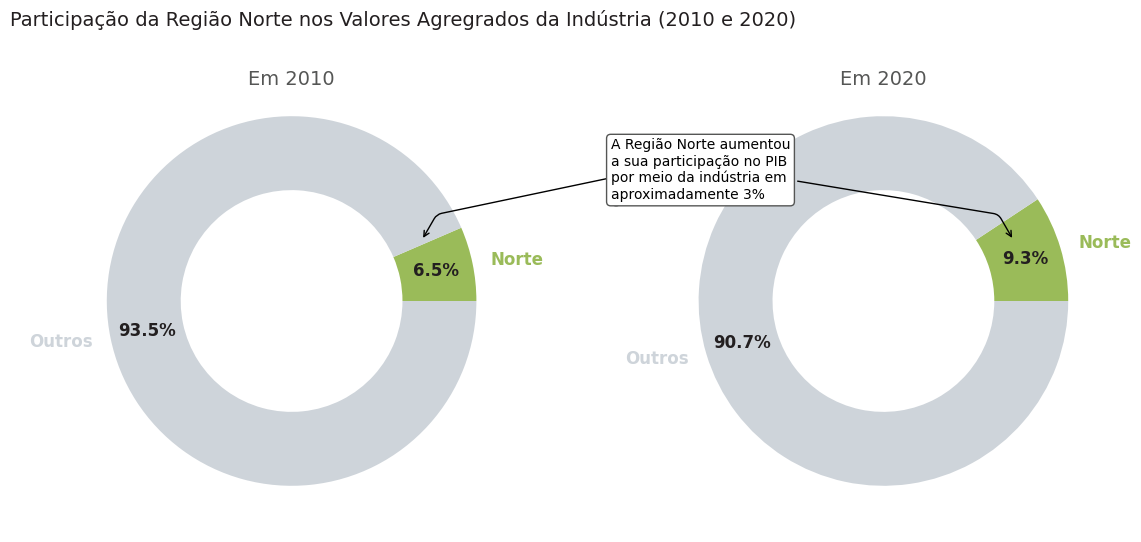

In [ ]:
# Área do gráfico e tema da visualização
fig, axs = plt.subplots(1, 2, figsize=(14,6))

# Definindo as cores do gráfico
cores = [VERDE2, CINZA6]

# Personalizando o gráfico
plt.suptitle('Participação da Região Norte nos Valores Agregrados da Indústria (2010 e 2020)',
             fontsize=14, color=CINZA1, ha = 'left', x = 0.1)

# GRÁFICO 1
pct, text, _ = axs[0].pie(data = df_norte_2010, x='va_industria', labels=df_norte_2010.index, autopct='%.1f%%',
                          pctdistance=0.8, wedgeprops=dict(width=0.4), textprops={'size':12, 'fontweight':'bold',
                                                                                  'color': CINZA1},
                          colors=cores)

# Título do Gráfico 1
axs[0].set_title('Em 2010', fontsize=14, color=CINZA3, y=0.95)

# Ajustando as cores das regiões relativas às fatias
for i, p in enumerate(pct):
  text[i].set_color(p.get_facecolor())

# GRÁFICO 2
pct, text, _ = axs[1].pie(data = df_norte_2020, x='va_industria', labels=df_norte_2020.index, autopct='%.1f%%',
                          pctdistance=0.8, wedgeprops=dict(width=0.4), textprops={'size':12, 'fontweight': 'bold',
                                                                                  'color': CINZA1},
                          colors=cores)

# Título do Gráfico 2
axs[1].set_title('Em 2020', fontsize=14, color=CINZA3, y=0.95)

# Ajustando as cores das regiões relativas às fatias
for i, p in enumerate(pct):
  text[i].set_color(p.get_facecolor())

# Anotações do gráfico
axs[0].annotate('\n\n\n', xy=(260, 210), xycoords='axes points', xytext=(400, 240), textcoords='axes points',
                bbox=dict(boxstyle="round", fc=BRANCO, ec=CINZA3), size=10,
                arrowprops=dict(arrowstyle="->",fc=CINZA1, connectionstyle="arc,angleA=0,angleB=60,armA=30,armB=30,rad=5"))

axs[1].annotate('A Região Norte aumentou\na sua participação no PIB\npor meio da indústria em\naproximadamente 3%',
                xy=(260, 210), xycoords='axes points', xytext=(-30, 240), textcoords='axes points',
                bbox=dict(boxstyle="round", fc=BRANCO, ec=CINZA3), size=10,
                arrowprops=dict(arrowstyle="->", fc=CINZA1, connectionstyle="arc,angleA=0,angleB=-60,armA=30,armB=-30,rad=5"))

plt.show()

# Desafio: gráficos de composição - Acréscimos e decréscimos

# Desafio 1:

Como está composto o PIB do Estado de São Paulo em 2020 partindo do valor agregado bruto dos bens e serviços produzidos e os impostos líquidos?

In [ ]:
df_pib

,ano,sigla_uf,regiao,pib,impostos_liquidos,va,va_agropecuaria,va_industria,va_servicos,va_adespss
0,2002,RO,Norte,7467629886,839731192,6627898698,715526872,1191090432,2484579193,2236702207
1,2003,RO,Norte,9425010486,1108434936,8316575548,1278658831,1216605061,3376727040,2444584625
2,2004,RO,Norte,11004641436,1288806654,9715834778,1288515348,1674933817,3986529419,2765856199
3,2005,RO,Norte,12511821181,1476144194,11035676990,1342222120,1887932121,4603783904,3201738843
4,2006,RO,Norte,13054713344,1613809974,11440903374,1238006193,2210692147,4320526746,3671678293
...,...,...,...,...,...,...,...,...,...,...
508,2016,DF,Centro-Oeste,235540044811,29145619376,206394425435,820754661,9662357225,103859865830,92051447720
509,2017,DF,Centro-Oeste,244722249337,29120461647,215601787690,828313642,8448768236,108322119432,98002586380
510,2018,DF,Centro-Oeste,254817204692,28692287369,226124917323,1022690641,9541298290,113768086938,101792841454
511,2019,DF,Centro-Oeste,273613711477,30686607647,242927103829,992393584,9453608031,125261853488,107219248727


In [ ]:
# Importando as bibliotecas
import pandas as pd
import plotly.graph_objects as go

# Importando a base de dados do PIB de 2002 a 2020
df_sp = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/dataviz-graficos-composicao-relacionamento/main/dados/pib_br_2002_2020_estados.csv")

# Criando um df com os dados desejados
df_sp = df_sp.query("sigla_uf == 'SP' and ano == 2020")[["va","impostos_liquidos", "pib"]]
df_sp.rename(columns = {"pib":"PIB", "impostos_liquidos": "Impostos Líquidos", "va":"Valor Agregado Bruto"}, inplace=True)

# Alterando o df para passar os indicadores para uma única coluna e seus valores em outra
df_sp = df_sp.melt(var_name = "Indicadores", value_name = "Valores")

# Criando uma coluna com os valores em string e outra com as medidas
df_sp["Valores_str"] = (df_sp["Valores"]/1e12).map("R$ {:,.3f} tri".format)
df_sp["Medidas"] = ["absolute", "relative", "total"]

df_sp

,Indicadores,Valores,Valores_str,Medidas
0,Valor Agregado Bruto,2014850308310,R$ 2.015 tri,absolute
1,Impostos Líquidos,362788671543,R$ 0.363 tri,relative
2,PIB,2377638979835,R$ 2.378 tri,total


In [ ]:
# Gerando o gráfico de cascata
fig = go.Figure( go.Waterfall(name = "", measure = df_sp["Medidas"],
                             x = df_sp["Indicadores"],  y = df_sp["Valores"],
                             text = df_sp["Valores_str"], textposition = "outside",
                             connector_line = dict(color = CINZA4),
                             totals_marker = dict(color = AZUL3),
                             increasing_marker = dict(color = VERDE1)
                             )
              )

# Personalizando o gráfico
fig.update_layout(width=800, height=400, font_family = 'DejaVu Sans', font_size=14,
                  font_color= CINZA2, title_font_color= CINZA1, title_font_size=18,
                  title_text='Composição do Produto Interno Bruto (PIB) de São Paulo em 2020' +
                             f'<br><sup size=1 style="color:{CINZA3}">Em trilhões de reais</sup>',
                  plot_bgcolor= BRANCO, yaxis_range=[0,2.6e12], hovermode="closest")

# Retirando os ticks do eixo y
fig.update_yaxes(showticklabels=False)

# Dados ao passar o mouse
fig.update_traces(hovertemplate = "<b>%{x}</b> = %{text}")

fig.show()

# Desafio 2:

Para o segundo desafio, vamos criar um gráfico de cascata com acréscimos e decréscimos, mostrando o comportamento de evolução e involução dos valores agregados do setor de serviços na região Nordeste entre os anos de 2016 e 2020.

In [ ]:
# Importando as bibliotecas
import pandas as pd
import plotly.graph_objects as go
import numpy as np

# Importando a base de dados do PIB de 2002 a 2020
df_ne = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/dataviz-graficos-composicao-relacionamento/main/dados/pib_br_2002_2020_estados.csv")

# Criando um df com os dados desejados
anos = [x for x in range(2016, 2021)]
df_ne = df_ne.query("regiao == 'Nordeste' and ano == @anos")[["ano","va_servicos"]]
df_ne = df_ne.groupby("ano").sum().reset_index()

# Gerando a coluna com a variação do valor agregado da indústria
# e passando o valor inicial para a 1ª linha da variação
df_ne["variacao_servicos"] = df_ne["va_servicos"].diff().fillna(df_ne["va_servicos"]).astype("int64")

# Gerando uma coluna com as Medidas para o gráfico de cascata
df_ne["Medidas"] = ["absolute"] + ["relative"] * 4

# Gerando uma observação com a atualização da última linha com o PIB total de 2020
linha = pd.Series({'ano': 'Total',
                   'va_servicos': df_ne["va_servicos"].values[-1],
                   'variacao_servicos': df_ne["va_servicos"].values[-1],
                   'Medidas': "total"}).to_frame().T

# Concatenando o df com a atualização e retirando a coluna pib
df_ne = pd.concat([df_ne, linha], axis = 0, ignore_index=True)
df_ne = df_ne.drop(columns=["va_servicos"])

# Criando uma coluna com os valores em string
df_ne["variacao_servicos_texto"] = (df_ne["variacao_servicos"]/1e9).map('R$ {:,.2f} Bi'.format)

df_ne

,ano,variacao_servicos,Medidas,variacao_servicos_texto
0,2016,391149062027,absolute,R$ 391.15 Bi
1,2017,22741449644,relative,R$ 22.74 Bi
2,2018,19559151320,relative,R$ 19.56 Bi
3,2019,17212017686,relative,R$ 17.21 Bi
4,2020,-14558880800,relative,R$ -14.56 Bi
5,Total,436102799877,total,R$ 436.10 Bi


In [ ]:
# Gerando o gráfico de cascata
fig = go.Figure( go.Waterfall(name = "", measure = df_ne["Medidas"], y = df_ne["variacao_servicos"],
                              text = df_ne["variacao_servicos_texto"], textposition = "outside",
                              connector_line = dict(color = CINZA3),
                              totals_marker = dict(color = AZUL3),
                              increasing_marker = dict(color = VERDE1),
                              decreasing_marker = dict(color = VERMELHO1)
                             )
                )

# Personalizando o gráfico
fig.update_layout(width=800, height=400, font_family = 'DejaVu Sans', font_size=12,
                  font_color= CINZA2, title_font_color= CINZA1, title_font_size=18,
                  title_text='Variação do Valor Agregado de Serviços no Nordeste' +
                             f'<br><sup size=1 style={CINZA3}>De 2016 a 2020 (em bilhões de reais)</sup>',
                  plot_bgcolor= BRANCO, yaxis_range=[0,500e9])

# Retirando os ticks do eixo y
fig.update_yaxes(showticklabels=False)

# Ajustando o eixo x para receber o Total
fig.update_xaxes(tickmode='array', tickvals=np.arange(0,6), ticktext=df_ne["ano"])

# Dados ao passar o mouse
fig.update_traces(hovertemplate = "<b>%{x}</b> = %{text}")

fig.add_annotation(text="No período destacado, <b>apenas</b><br>no ano de 2020 houve recuo do<br>valor agregado do <b>setor de<br>serviços</b> na região Nordeste",
                   align="left", axref = 'x', ayref='y', x=4, y=390e9, ax=3, ay=250e9,
                   arrowhead=1, arrowside = "start", showarrow=True, arrowwidth=2, arrowcolor=CINZA3,
                   bordercolor= CINZA3, borderwidth=1, borderpad=4)

fig.show()

# Desafio: gráficos de composição

# Desafio 1:

Como está composto, em valores absolutos, o PIB por região dos 4 últimos anos do conjunto de dados (2017 a 2020)?

Para o primeiro desafio vamos criar um gráfico de colunas empilhadas com os valores absolutos do PIB separados por região pelos anos de 2017 a 2020. Importante definir as cores e construir a legenda na sequência em que visualizamos os dados, para facilitar a leitura do gráfico. Os dados estão na ordem de trilhões de reais.

In [ ]:
AZUL1, AZUL2, AZUL3, AZUL4, AZUL5, AZUL6 = '#174A7E', '#4A81BF', "#6495ED", '#2596BE', '#94AFC5', '#CDDBF3'
CINZA1, CINZA2, CINZA3, CINZA4, CINZA5, CINZA6, BRANCO = '#231F20', '#414040', '#555655', '#A6A6A5', '#BFBEBE', '#CED4DA' , '#FFFFFF'
VERMELHO1, VERMELHO2, LARANJA1 = '#C3514E',	'#E6BAB7', '#F79747'
VERDE1, VERDE2, VERDE3 = '#0C8040', '#9ABB59', '#9ECCB3'

In [ ]:
df_pib.head()

,ano,sigla_uf,regiao,pib,impostos_liquidos,va,va_agropecuaria,va_industria,va_servicos,va_adespss
0,2002,RO,Norte,7467629886,839731192,6627898698,715526872,1191090432,2484579193,2236702207
1,2003,RO,Norte,9425010486,1108434936,8316575548,1278658831,1216605061,3376727040,2444584625
2,2004,RO,Norte,11004641436,1288806654,9715834778,1288515348,1674933817,3986529419,2765856199
3,2005,RO,Norte,12511821181,1476144194,11035676990,1342222120,1887932121,4603783904,3201738843
4,2006,RO,Norte,13054713344,1613809974,11440903374,1238006193,2210692147,4320526746,3671678293


In [ ]:
# Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

# Importando a base de dados do PIB de 2002 a 2020
df_reg = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/dataviz-graficos-composicao-relacionamento/main/dados/pib_br_2002_2020_estados.csv")

# Criando um df com os dados desejados
anos = [x for x in range(2017,2021)]
df_reg = df_reg.query("ano == @anos")[["ano","regiao","pib"]]
df_reg["pib"] = (df_reg["pib"] / 1e12).round(2)

# Criando uma tabela cruzada (crosstab) com os valores de cada ano por região
df_reg = pd.crosstab(index = df_reg.ano, columns = df_reg.regiao,
                            values = df_reg.pib, aggfunc = "sum")
df_reg = df_reg[["Sudeste", "Sul", "Nordeste", "Centro-Oeste", "Norte"]]
df_reg = df_reg.reset_index()

df_reg

regiao,ano,Sudeste,Sul,Nordeste,Centro-Oeste,Norte
0,2017,3.48,1.12,0.95,0.66,0.36
1,2018,3.72,1.20,1.01,0.70,0.39
2,2019,3.92,1.27,1.04,0.73,0.43
3,2020,3.95,1.31,1.09,0.79,0.49


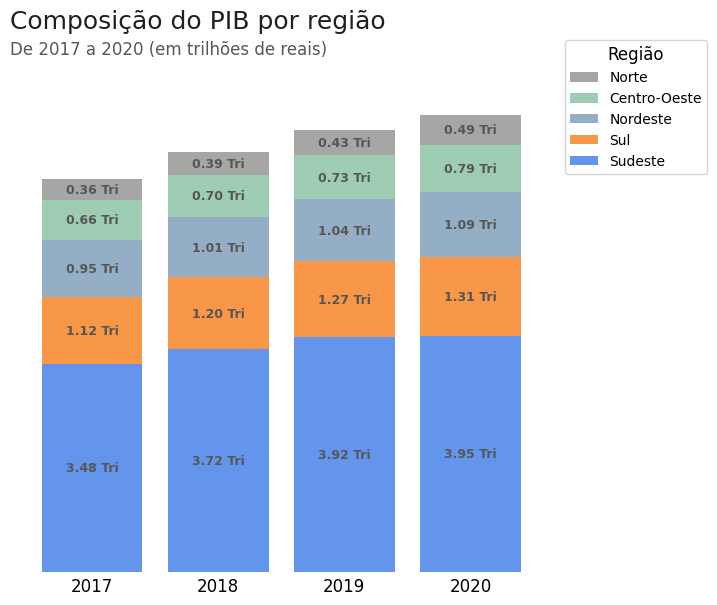

In [ ]:
# Área do gráfico e tema da visualização
fig, ax = plt.subplots(figsize=(7,7))

# Definindo as cores do gráfico
cores = [AZUL3, LARANJA1, AZUL5, VERDE3, CINZA4]

# Personalizando o título
ax.set_title("Composição do PIB por região", fontsize=18, color=CINZA1, ha = 'left', x=0, transform=ax.transAxes)
ax.text(0, 0.97, "De 2017 a 2020 (em trilhões de reais)", color= CINZA3, fontsize=12, ha='left', va='center', transform=ax.transAxes)

# Construindo o gráfico de colunas empilhadas
df_reg.plot(x = "ano", kind="bar", width=0.8, stacked = True, color = cores, ax = ax)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_yticklabels([])
ax.xaxis.set_tick_params(labelsize=12, color = CINZA2, labelrotation = 0)
ax.set_ylim(0, 9)
ax.set_frame_on(False)

# Adicionar a legenda do lado superior direito
ax.legend(bbox_to_anchor=(1.01, 1), reverse = True, title='Região', title_fontsize  = 12, fontsize = 10)

# remover todos os ticks do eixo x e y
ax.tick_params(axis='both', which='both', length=0)

# Adicionando os valores dentro da coluna
for container in ax.containers:
    labels = [f'{valor.get_height():.2f} Tri' for valor in container]
    ax.bar_label(container, label_type='center', labels = labels, size = 9, color = CINZA3, fontweight = "bold")

plt.show()

# Desafio 2:

# Como está composto os valores agregados brutos dos bens e serviços (em valor absoluto) em relação aos Estados da região Centro-Oeste no ano de 2020?

Para o segundo desafio, vamos criar um gráfico de barras empilhadas com cada um dos Estados da região Centro-Oeste representados com uma barra com os diferentes valores agregados empilhados. Vamos utilizar a função para texto colorido para legenda e escrita do texto informativo. Os dados estão na ordem de bilhões de reais.

In [ ]:
# Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

# Importando a base de dados do PIB de 2002 a 2020
df_n_estados = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/dataviz-graficos-composicao-relacionamento/main/dados/pib_br_2002_2020_estados.csv")

# Criando um df com os dados desejados
df_n_estados = df_n_estados.query("regiao == 'Centro-Oeste' and ano == 2020")[["sigla_uf","va_servicos", "va_industria", "va_adespss", "va_agropecuaria"]]
df_n_estados = df_n_estados.set_index("sigla_uf")
df_n_estados = df_n_estados.sort_values(by="va_servicos", axis=0)

df_n_estados

,va_servicos,va_industria,va_adespss,va_agropecuaria
sigla_uf,,,,
MS,40463334838,23313710730,20075400418,26045011196
MT,62253821963,27663774472,23686938663,46004316712
GO,89797907217,47124851599,33887411346,29022562983
DF,116547655370,10942472569,111267001381,1623976909


In [ ]:
# Código para gerar o texto colorido
from matplotlib import transforms

def texto_colorido(x, y, texto, cores, esp=20, ax=None, **kw):
    cores = list(reversed(cores))
    t = ax.transData
    canvas = ax.figure.canvas

    for i, linha in enumerate(reversed(texto.split('\n'))):
        frases = linha.split('||')
        for s, cor in zip(frases, cores[i]):
            texto = ax.text(x, y, s, color=cor, transform=t, **kw)
            texto.draw(canvas.get_renderer())
            ex = texto.get_window_extent()
            t = transforms.offset_copy(texto._transform, x=ex.width,
                                       units='dots')

        t = transforms.offset_copy(ax.transData, x=0, y=(i + 1) * esp, units='dots')

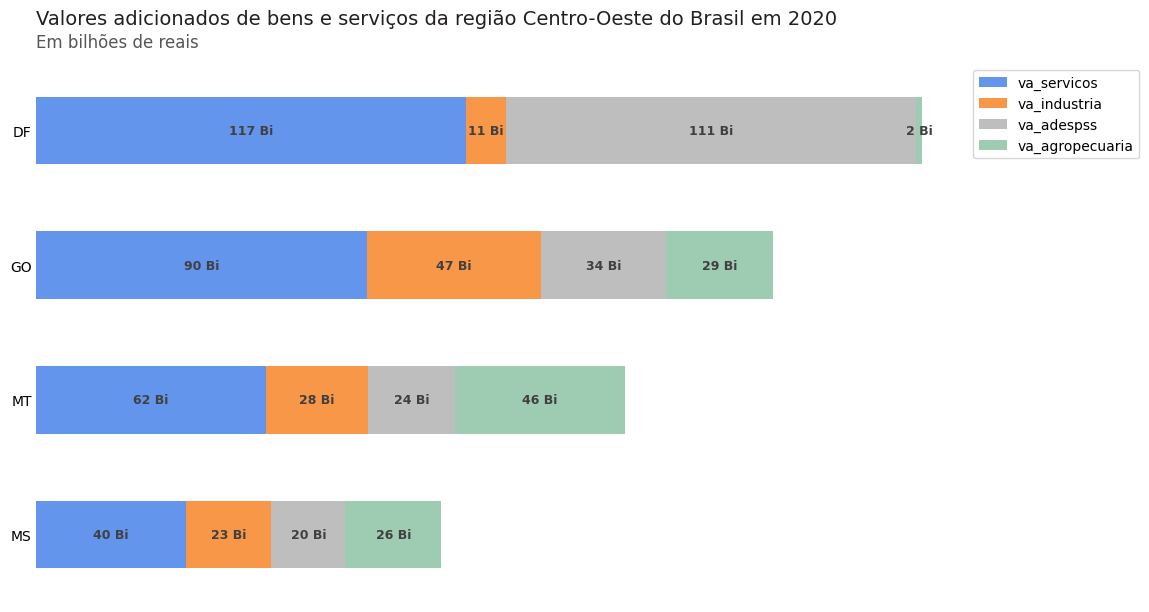

In [ ]:
def grafico_va():
  # Área do gráfico e tema da visualização
  fig, ax = plt.subplots(figsize=(12,7))

  # Definindo as cores do gráfico
  cores = [AZUL3, LARANJA1, CINZA5, VERDE3]

  # Gerando o gráfico de barras empilhadas 100%
  df_n_estados.plot(kind="barh", stacked=True, color = cores, ax=ax)

  ## Personalizando o gráfico
  plt.suptitle('Valores adicionados de bens e serviços da região Centro-Oeste do Brasil em 2020', size=14,
               color=CINZA1, ha = 'left', x = 0, y = 1.1, transform=ax.transAxes)
  plt.title('Em bilhões de reais', fontsize=12, color=CINZA3, ha = "left", x = 0, y = 1.03, transform=ax.transAxes)
  ax.legend(bbox_to_anchor=(1, 1), bbox_transform=ax.transAxes, fontsize = 10, loc='upper left')
  ax.set_ylabel('')
  ax.set_xticklabels([])
  ax.yaxis.set_tick_params(labelsize=10, color = CINZA2)
  ax.set_frame_on(False)

  # remover todos os ticks do eixo x e y
  ax.tick_params(axis='both', which='both', length=0)

  # Valores das barras
  for container in ax.containers:
      labels = [f'{valor.get_width()/1e9:.0f} Bi' for valor in container]
      ax.bar_label(container, label_type='center', labels = labels, size = 9, color = CINZA2, fontweight='bold')

  return ax, cores

ax, cores = grafico_va()

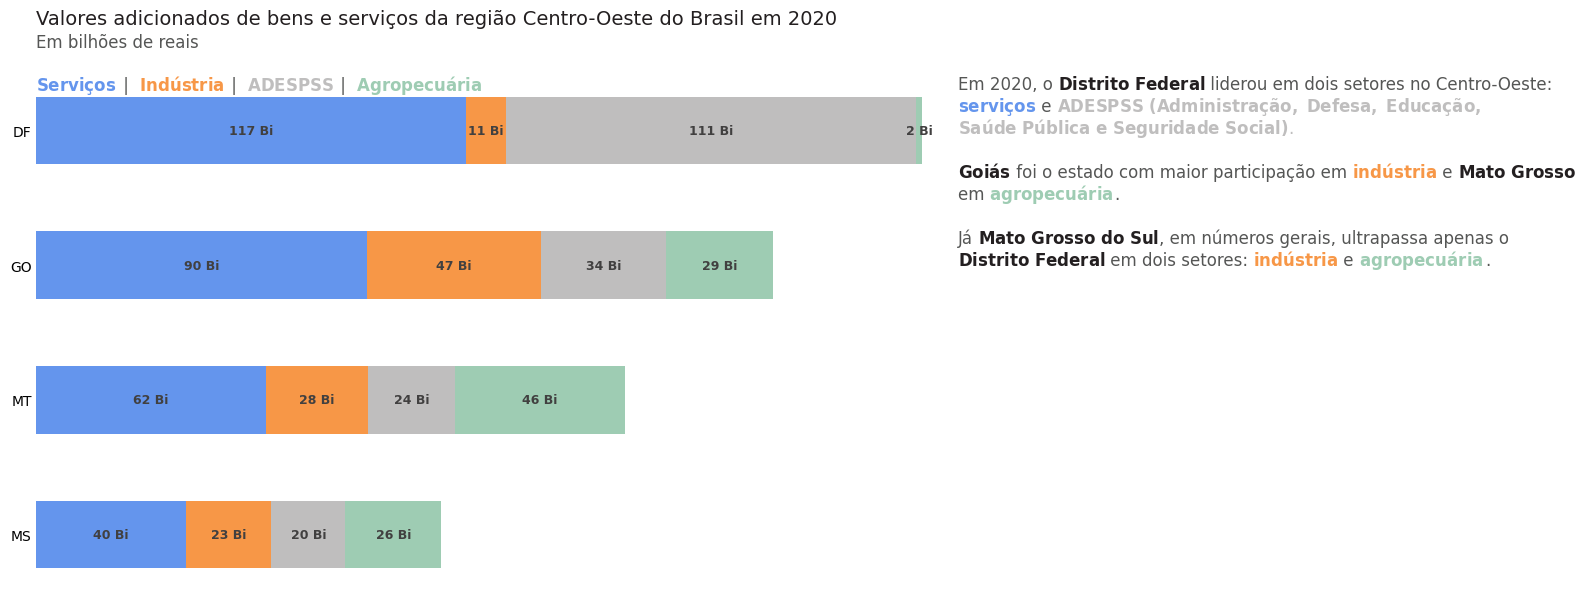

In [ ]:
# Gerando o gráfico de barras empilhadas e salvando as cores que vamos utilizar no texto
ax, cores = grafico_va()

## Trabalhando com o texto colorido para legenda e anotações

# legenda das barras
ax.legend().remove()    # remover legenda padrão da visualização
texto_colorido(0, 3.3, '$\\bf{Serviços}$ || | || $\\bf{Indústria}$ || | || $\\bf{ADESPSS}$ || | || $\\bf{Agropecuária}$',
               cores = [[cores[0], CINZA3, cores[1], CINZA3, cores[2], CINZA3, cores[3]]], ax=ax, fontsize=12)

# Anotando uma conclusão no gráfico
texto_colorido(
    250e9, 2,                                                             # coordenadas
    'Em 2020, o ||$\\bf{Distrito\ Federal}$|| liderou em dois setores no Centro-Oeste:\n'
    '$\\bf{serviços}$|| e ||$\\bf{ADESPSS\ (Administração,\ Defesa,\ Educação,}$\n'
    '$\\bf{Saúde\ Pública\ e\ Seguridade\ Social)}$.\n'
    '\n'
    '$\\bf{Goiás}$|| foi o estado com maior participação em ||$\\bf{indústria}$|| e ||$\\bf{Mato\ Grosso}$\n'
    'em ||$\\bf{agropecuária}$||.\n'
    '\n'
    'Já ||$\\bf{Mato\ Grosso\ do\ Sul}$||, em números gerais, ultrapassa apenas o\n'
    '$\\bf{Distrito\ Federal}$|| em dois setores: ||$\\bf{indústria}$|| e ||$\\bf{agropecuária}$ ||.',
    [[CINZA3, CINZA1, CINZA3],                     # linha 1                          # cores
     [AZUL3, CINZA3, CINZA5],                      # linha 2
     [CINZA5],                                     # linha 3
     [CINZA3],                                     # linha 4
     [CINZA1, CINZA3, LARANJA1, CINZA3, CINZA1],   # linha 5
     [CINZA3, VERDE3, CINZA3],                     # linha 6
     [CINZA3],                                     # linha 7
     [CINZA3, CINZA1, CINZA3],     # linha 8
     [CINZA1, CINZA3, LARANJA1, CINZA3, VERDE3, CINZA3],   # linha 9
    ],
    esp=22,         # espaçamento
    ax=ax,          # figura onde desenhar o texto
    fontsize=12)

fig.show()

#Desafio 1:

No setor de Administração, Defesa, Educação, Saúde Pública e Seguridade Social (ADESPSS), como estão distribuídos os valores adicionados por região, em valores relativos, dentro do período da base dos dados (2002 - 2020)?

In [ ]:
AZUL1, AZUL2, AZUL3, AZUL4, AZUL5, AZUL6 = '#174A7E', '#4A81BF', "#6495ED", '#2596BE', '#94AFC5', '#CDDBF3'
CINZA1, CINZA2, CINZA3, CINZA4, CINZA5, CINZA6, BRANCO = '#231F20', '#414040', '#555655', '#A6A6A5', '#BFBEBE', '#CED4DA' , '#FFFFFF'
VERMELHO1, VERMELHO2, LARANJA1 = '#C3514E',	'#E6BAB7', '#F79747'
VERDE1, VERDE2, VERDE3 = '#0C8040', '#9ABB59', '#9ECCB3'

In [ ]:
# Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

# Importando a base de dados do PIB de 2002 a 2020
df_ind = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/dataviz-graficos-composicao-relacionamento/main/dados/pib_br_2002_2020_estados.csv")

# Selecionando os dados desejados
df_ind = df_ind[["regiao", "ano", "va_adespss"]]

# Agrupando os dados por região e ano
df_ind = pd.crosstab(index = df_ind.ano, columns = df_ind.regiao, values = df_ind.va_adespss,
                     aggfunc="sum", normalize="index")
df_ind = (df_ind*100).round(2)
df_ind = df_ind[["Sudeste", "Sul", "Nordeste", "Centro-Oeste", "Norte"]]
df_ind

regiao,Sudeste,Sul,Nordeste,Centro-Oeste,Norte
ano,,,,,
2002,45.80,12.44,19.25,15.24,7.27
2003,45.17,13.08,19.17,15.23,7.34
2004,44.67,12.82,19.03,16.03,7.45
2005,44.41,12.83,19.51,15.72,7.52
2006,43.70,12.61,19.99,16.02,7.68
2007,44.23,12.62,19.86,15.65,7.64
2008,44.19,12.43,20.00,15.75,7.63
2009,43.84,12.07,20.45,15.94,7.70
2010,42.55,12.88,20.81,15.88,7.88


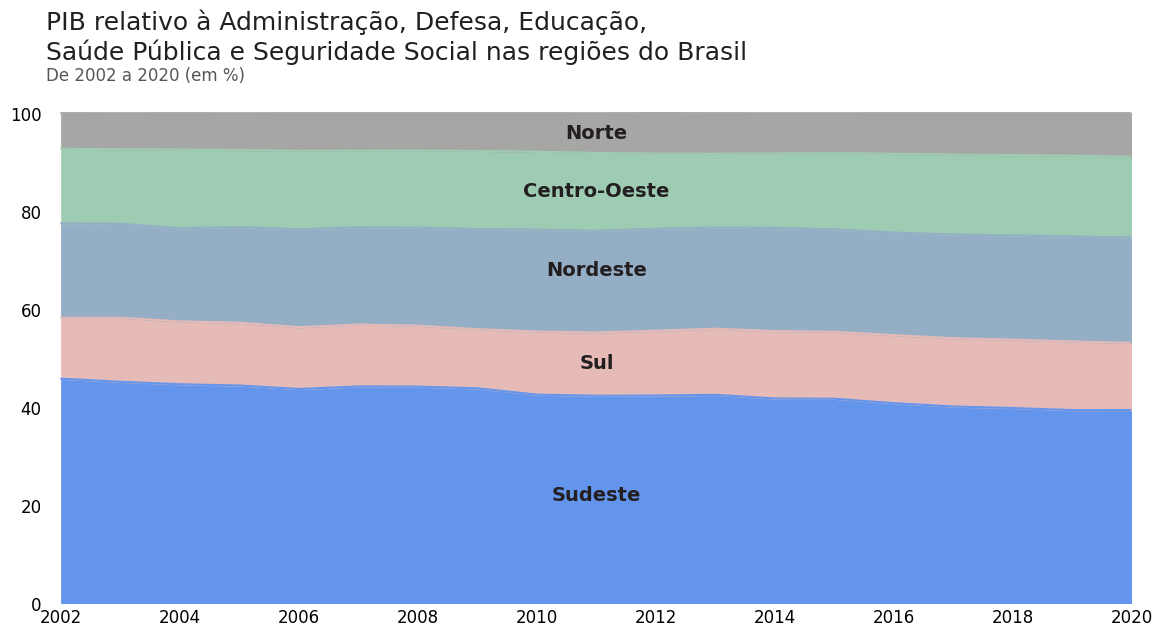

In [ ]:
# Área do gráfico e tema da visualização
fig, ax = plt.subplots(figsize=(14,7))

# Definindo as cores do gráfico
cores = [AZUL3, VERMELHO2, AZUL5, VERDE3, CINZA4]

# Gerando o gráfico de áreas empilhadas
df_ind.plot(kind="area", stacked=True, color = cores, ax = ax, xticks = range(2002, 2021, 2))

## Personalizando o gráfico
ax.set_title('PIB relativo à Administração, Defesa, Educação, \nSaúde Pública e Seguridade Social nas regiões do Brasil', fontsize = 18, color = CINZA1, loc='left', x = 0, transform=ax.transAxes)
ax.text(0, 0.98, "De 2002 a 2020 (em %)", transform=ax.transAxes, color= CINZA3, fontsize=12, ha='left', va='center')
ax.set_ylabel('')
ax.set_xlabel('')
ax.xaxis.set_tick_params(labelsize=12, color = CINZA2)
ax.yaxis.set_tick_params(labelsize=12, color = CINZA2)
plt.ylim(0, 110)              # ajustando os limites do eixo y
ax.set_xbound(2001.75,2020)   # ajustando os limites do eixo x
ax.legend().remove()
ax.set_frame_on(False)

## Anotando os nomes das regiões
reg = df_ind.columns
y_pos = [21, 48, 67, 83, 95]
for i in range(len(reg)):
  ax.text(2011, y_pos[i], f'{reg[i]}', color = CINZA1, weight = "bold", fontsize = 14, ha="center", transform=ax.transData)

# remover todos os ticks do eixo x e y
ax.tick_params(axis='both', which='both', length=0)

plt.show()

#Desafio 2:

Qual foi a variação do PIB relativo à indústria nas regiões do Brasil nos anos de 2010, 2015 e 2020?

In [ ]:
# Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

# Importando a base de dados do PIB de 2002 a 2020
df_ind = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/dataviz-graficos-composicao-relacionamento/main/dados/pib_br_2002_2020_estados.csv")

# Selecionando os dados desejados
df_ind = df_ind[["regiao", "ano", "va_adespss"]]

# Agrupando os dados por região e ano
df_ind = pd.crosstab(index = df_ind.ano, columns = df_ind.regiao, values = df_ind.va_adespss,
                     aggfunc="sum", normalize="index")
df_ind = (df_ind*100).round(2)
df_ind = df_ind[["Sudeste", "Sul", "Nordeste", "Centro-Oeste", "Norte"]]
df_ind

regiao,Sudeste,Sul,Nordeste,Centro-Oeste,Norte
ano,,,,,
2002,45.80,12.44,19.25,15.24,7.27
2003,45.17,13.08,19.17,15.23,7.34
2004,44.67,12.82,19.03,16.03,7.45
2005,44.41,12.83,19.51,15.72,7.52
2006,43.70,12.61,19.99,16.02,7.68
2007,44.23,12.62,19.86,15.65,7.64
2008,44.19,12.43,20.00,15.75,7.63
2009,43.84,12.07,20.45,15.94,7.70
2010,42.55,12.88,20.81,15.88,7.88


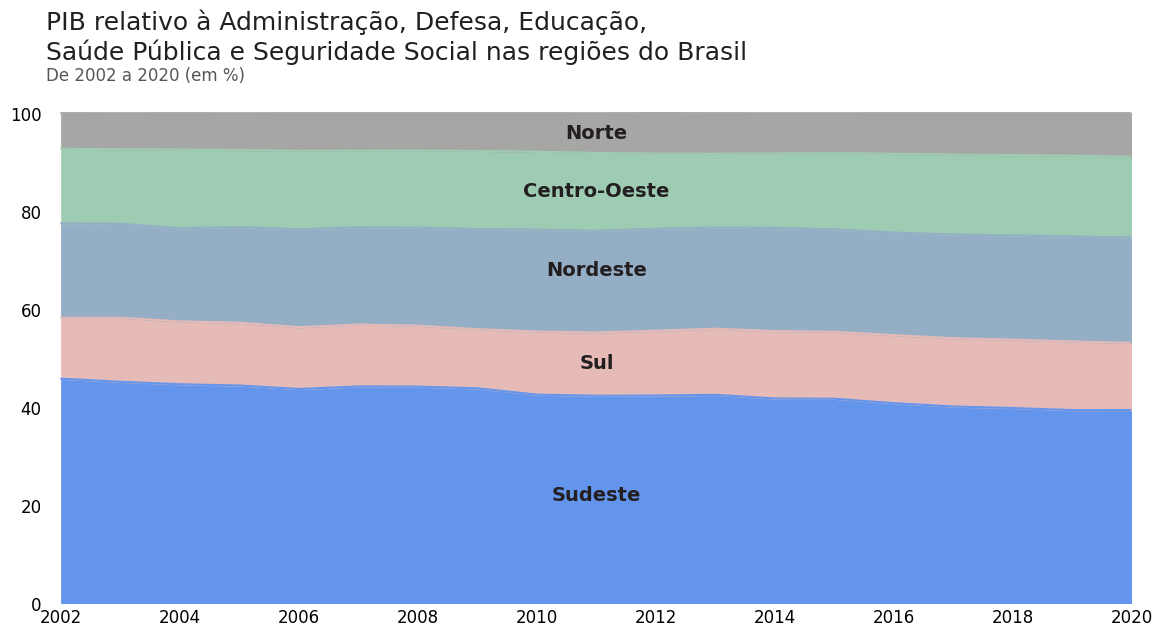

In [ ]:
# Área do gráfico e tema da visualização
fig, ax = plt.subplots(figsize=(14,7))

# Definindo as cores do gráfico
cores = [AZUL3, VERMELHO2, AZUL5, VERDE3, CINZA4]

# Gerando o gráfico de áreas empilhadas
df_ind.plot(kind="area", stacked=True, color = cores, ax = ax, xticks = range(2002, 2021, 2))

## Personalizando o gráfico
ax.set_title('PIB relativo à Administração, Defesa, Educação, \nSaúde Pública e Seguridade Social nas regiões do Brasil', fontsize = 18, color = CINZA1, loc='left', x = 0, transform=ax.transAxes)
ax.text(0, 0.98, "De 2002 a 2020 (em %)", transform=ax.transAxes, color= CINZA3, fontsize=12, ha='left', va='center')
ax.set_ylabel('')
ax.set_xlabel('')
ax.xaxis.set_tick_params(labelsize=12, color = CINZA2)
ax.yaxis.set_tick_params(labelsize=12, color = CINZA2)
plt.ylim(0, 110)              # ajustando os limites do eixo y
ax.set_xbound(2001.75,2020)   # ajustando os limites do eixo x
ax.legend().remove()
ax.set_frame_on(False)

## Anotando os nomes das regiões
reg = df_ind.columns
y_pos = [21, 48, 67, 83, 95]
for i in range(len(reg)):
  ax.text(2011, y_pos[i], f'{reg[i]}', color = CINZA1, weight = "bold", fontsize = 14, ha="center", transform=ax.transData)

# remover todos os ticks do eixo x e y
ax.tick_params(axis='both', which='both', length=0)

plt.show()

 Neste caso, você precisa representar a composição dos acessos dos usuários nos últimos 5 anos (2018 a 2022) na plataforma, tomando como base o acesso realizado nos três países em que a empresa possui clientes. A base de dados que você recebeu possui as quantidades de acesso dos três países (Brasil, Argentina e Colômbia) em cada ano de pesquisa.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Acessos em milhões de cada país em cada ano
acessos = pd.DataFrame({'Ano': [2018, 2019, 2020, 2021, 2022], 'Brasil': [120, 150, 180, 200, 220],
                        'Argentina': [85, 110, 130, 150, 170],  'Colômbia': [50, 70, 90, 110, 130]})

acessos = acessos.set_index("Ano")
acessos

,Brasil,Argentina,Colômbia
Ano,,,
2018,120,85,50
2019,150,110,70
2020,180,130,90
2021,200,150,110
2022,220,170,130


In [ ]:
# Normalizando os números de acessos e deixando-os numa escala de 0 a 100
acessos_normalizados = (acessos.div(acessos.sum(axis=1), axis=0) * 100).round(1)
acessos_normalizados

,Brasil,Argentina,Colômbia
Ano,,,
2018,47.1,33.3,19.6
2019,45.5,33.3,21.2
2020,45.0,32.5,22.5
2021,43.5,32.6,23.9
2022,42.3,32.7,25.0


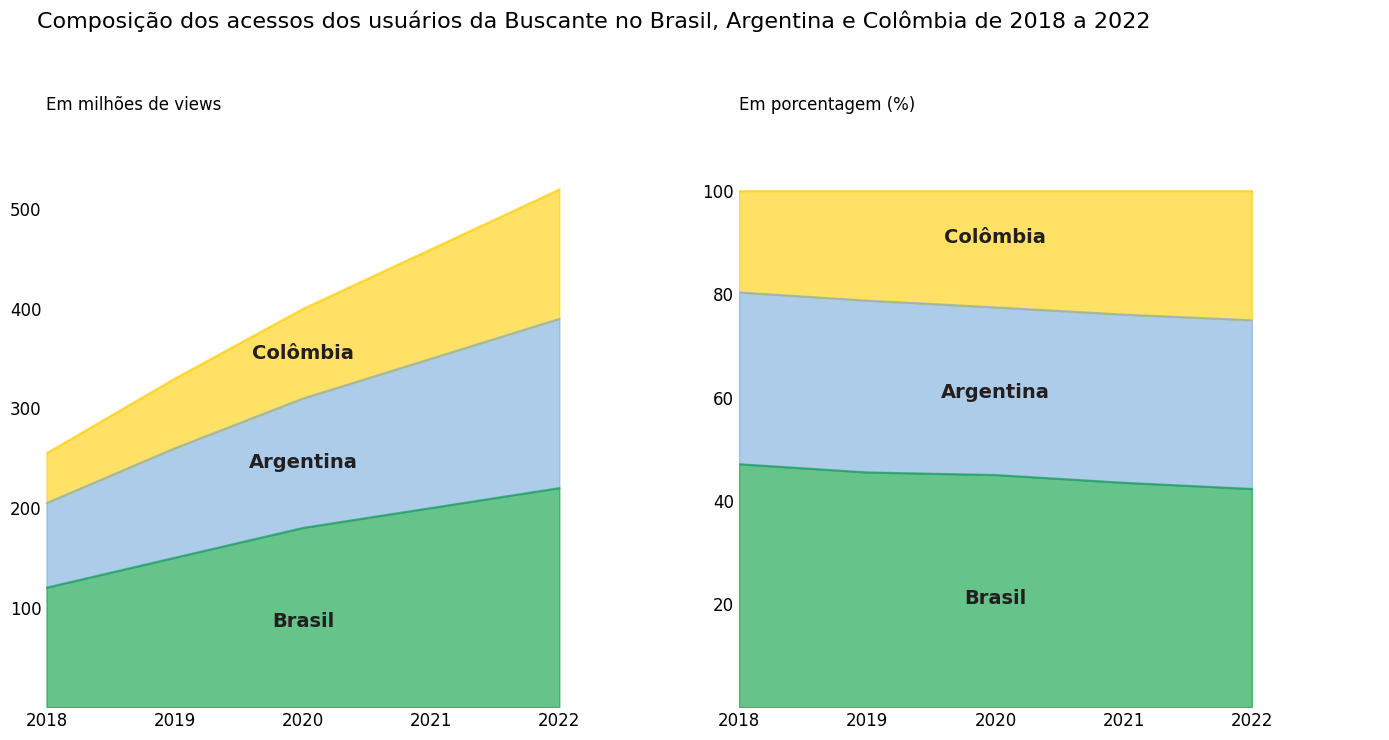

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(14,7))

fig.suptitle('Composição dos acessos dos usuários da Buscante no Brasil, Argentina e Colômbia de 2018 a 2022',
             fontsize = 16, ha = 'left', x = 0.03, y = 1.05)

# GRÁFICO 1 - gráfico de áreas empilhadas

acessos.plot.area(color = ["#009C3B", "#75AADB", "#FFCD00"], xticks=np.arange(2018, 2023,1), ax = axs[0], alpha= 0.6)
axs[0].set_title('Em milhões de views\n', loc = "left")
axs[0].set_ylabel('')
axs[0].set_xlabel('')
axs[0].xaxis.set_tick_params(labelsize=12)
axs[0].yaxis.set_tick_params(labelsize=12)
axs[0].set_ylim(0.01, 570)     # ajustando os limites do eixo y
axs[0].set_xbound(2018,2023)   # ajustando os limites do eixo x
axs[0].legend().remove()
axs[0].tick_params(axis='both', which='both', length=0)
axs[0].set_frame_on(False)

## Anotando os nomes das regiões
pais = acessos.columns
y_pos = [80, 240, 350]
for i in range(len(pais)):
  axs[0].text(2020, y_pos[i], f'{pais[i]}', color = '#231F20', weight = "bold", fontsize = 14, ha="center", transform=axs[0].transData)

#######################################

# GRÁFICO 2 - gráfico de áreas empilhadas 100%

acessos_normalizados.plot.area(color = ["#009C3B", "#75AADB", "#FFCD00"], xticks=np.arange(2018, 2023,1), ax = axs[1], alpha= 0.6)
axs[1].set_title('Em porcentagem (%)\n', loc = "left")
axs[1].set_ylabel('')
axs[1].set_xlabel('')
axs[1].xaxis.set_tick_params(labelsize=12)
axs[1].yaxis.set_tick_params(labelsize=12)
axs[1].set_ylim(0.01, 110)     # ajustando os limites do eixo y
axs[1].set_xbound(2018,2023)   # ajustando os limites do eixo x
axs[1].legend().remove()
axs[1].tick_params(axis='both', which='both', length=0)
axs[1].set_frame_on(False)

## Anotando os nomes das regiões
pais = acessos_normalizados.columns
y_pos = [20, 60, 90]
for i in range(len(pais)):
  axs[1].text(2020, y_pos[i], f'{pais[i]}', color = '#231F20', weight = "bold", fontsize = 14, ha="center", transform=axs[1].transData)

plt.tight_layout()
plt.show()